In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('C:\\Users\\samre\\Downloads\\archive(1).zip')


In [3]:
#understanding the structure
df.head()


,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [4]:
#checking for missing values and handling them
df.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [5]:
#checking data types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [6]:
#datapreprocessing : categorical to numerical values

df = df.drop(columns=['date_of_registration'])

categorical_cols = ['telecom_partner', 'gender', 'state', 'city']
encoded_df = pd.get_dummies(df, columns=categorical_cols)
print(encoded_df.head())

# Splitting the dataset into feature variables (X) and the target variable (y)
X = encoded_df.drop(columns=['churn']) 
y = encoded_df['churn']  

print("Feature variables (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())



   customer_id  age  pincode  num_dependents  estimated_salary  calls_made  \
0            1   25   755597               4            124962          44   
1            2   55   125926               2            130556          62   
2            3   57   423976               0            148828          49   
3            4   46   522841               1             38722          80   
4            5   26   740247               2             55098          78   

   sms_sent  data_used  churn  telecom_partner_Airtel  ...  state_Tripura  \
0        45       -361      0                   False  ...          False   
1        39       5973      0                   False  ...          False   
2        24        193      1                   False  ...          False   
3        25       9377      1                   False  ...          False   
4        15       1393      0                   False  ...           True   

   state_Uttar Pradesh  state_Uttarakhand  state_West Bengal  city_B

In [7]:
#train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [9]:
#model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division='warn')



C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Check class distribution
print(df['churn'].value_counts())


churn
0    194726
1     48827
Name: count, dtype: int64


In [11]:
from imblearn.over_sampling import RandomOverSampler

# Define the oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(pd.Series(y_train_resampled).value_counts())


churn
1    155798
0    155798
Name: count, dtype: int64


In [12]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [15]:
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
significant_predictors = coefficients[coefficients['coefficient'] != 0]

In [16]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Interpret Results
print("Significant Predictors:")
print(significant_predictors)

Accuracy: 0.48685101927696
Confusion Matrix:
[[18565 20363]
 [ 4633  5150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60     38928
           1       0.20      0.53      0.29      9783

    accuracy                           0.49     48711
   macro avg       0.50      0.50      0.44     48711
weighted avg       0.68      0.49      0.54     48711

Significant Predictors:
                         feature   coefficient
0                    customer_id  1.099265e-07
1                            age -4.537605e-10
2                        pincode  1.062443e-08
3                 num_dependents -9.762581e-10
4               estimated_salary -2.653132e-07
5                     calls_made  1.202376e-08
6                       sms_sent -1.007256e-08
7                      data_used  7.974719e-07
8         telecom_partner_Airtel  3.237414e-10
9           telecom_partner_BSNL -3.220066e-10
10  telecom_partner_Reliance Jio 

In [19]:
# Feature Engineering: Adding a new feature representing total interactions
df['total_interactions'] = df['calls_made'] + df['sms_sent']


In [20]:
# Calculate churn rates for each telecom partner
churn_rates = df.groupby('telecom_partner')['churn'].mean().sort_values(ascending=False)

# Display the telecom partner with the lowest churn rate (i.e., highest customer satisfaction)
top_telecom_partner = churn_rates.idxmin()
print("Telecom Partner with the Highest Customer Satisfaction:", top_telecom_partner)


Telecom Partner with the Highest Customer Satisfaction: BSNL


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
df = pd.read_csv('C:\\Users\\samre\\Downloads\\archive(1).zip')

# Drop irrelevant columns
df = df.drop(columns=['date_of_registration'])

# Encode categorical variables
categorical_cols = ['telecom_partner', 'gender', 'state', 'city']
encoded_df = pd.get_dummies(df, columns=categorical_cols)

# Split the dataset into features and target variable
X = encoded_df.drop(columns=['churn'])
y = encoded_df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Initial Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Add the additional code for oversampling
# Define the oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Reinitialize and train a logistic regression model using the resampled data
model_resampled = LogisticRegression()
model_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = model_resampled.predict(X_test)

# Evaluate the model after resampling
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
confusion_mat_resampled = confusion_matrix(y_test, y_pred_resampled)
classification_rep_resampled = classification_report(y_test, y_pred_resampled)

print("\nLogistic Regression Model with Random OverSampling Evaluation:")
print("Accuracy:", accuracy_resampled)
print("Confusion Matrix:")
print(confusion_mat_resampled)
print("Classification Report:")
print(classification_rep_resampled)


C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Initial Logistic Regression Model Evaluation:
Accuracy: 0.7991624068485558
Confusion Matrix:
[[38928     0]
 [ 9783     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     38928
           1       0.00      0.00      0.00      9783

    accuracy                           0.80     48711
   macro avg       0.40      0.50      0.44     48711
weighted avg       0.64      0.80      0.71     48711

Class distribution after resampling:
churn
1    155798
0    155798
Name: count, dtype: int64

Logistic Regression Model with Random OverSampling Evaluation:
Accuracy: 0.48685101927696
Confusion Matrix:
[[18565 20363]
 [ 4633  5150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.48      0.60     38928
           1       0.20      0.53      0.29      9783

    accuracy                           0.49     48711
   macro avg       0.50      0.50      0.44     4871

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
df = pd.read_csv('C:\\Users\\samre\\Downloads\\archive(1).zip')

# Drop irrelevant columns
df = df.drop(columns=['date_of_registration'])

# Encode categorical variables
categorical_cols = ['telecom_partner', 'gender', 'state', 'city']
encoded_df = pd.get_dummies(df, columns=categorical_cols)

# Split the dataset into features and target variable
X = encoded_df.drop(columns=['churn'])
y = encoded_df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model without oversampling
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Logistic Regression Model Evaluation without Oversampling:")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Print significant predictors
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
significant_predictors = coefficients[coefficients['coefficient'] != 0]
print("\nSignificant Predictors:")
print(significant_predictors)

# Define the oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("\nClass distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Reinitialize and train a logistic regression model using the resampled data
model_resampled = LogisticRegression()
model_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = model_resampled.predict(X_test)

# Evaluate the model after resampling
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
confusion_mat_resampled = confusion_matrix(y_test, y_pred_resampled)
classification_rep_resampled = classification_report(y_test, y_pred_resampled)

print("\nLogistic Regression Model Evaluation with Random OverSampling:")
print("Accuracy:", accuracy_resampled)
print("Confusion Matrix:")
print(confusion_mat_resampled)
print("Classification Report:")
print(classification_rep_resampled)

# Print significant predictors after resampling
coefficients_resampled = pd.DataFrame({'feature': X.columns, 'coefficient': model_resampled.coef_[0]})
significant_predictors_resampled = coefficients_resampled[coefficients_resampled['coefficient'] != 0]
print("\nSignificant Predictors after resampling:")
print(significant_predictors_resampled)


C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model Evaluation without Oversampling:
Accuracy: 0.7991624068485558
Confusion Matrix:
[[38928     0]
 [ 9783     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     38928
           1       0.00      0.00      0.00      9783

    accuracy                           0.80     48711
   macro avg       0.40      0.50      0.44     48711
weighted avg       0.64      0.80      0.71     48711


Significant Predictors:
                         feature   coefficient
0                    customer_id -2.053019e-06
1                            age -4.620562e-07
2                        pincode -6.866306e-07
3                 num_dependents -2.082153e-08
4               estimated_salary -5.401122e-06
5                     calls_made -4.808294e-07
6                       sms_sent -2.476500e-07
7                      data_used -4.859323e-05
8         telecom_partner_Airtel -2.202120e-09
9           teleco

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('C:\\Users\\samre\\Downloads\\archive(1).zip')

# Drop irrelevant columns
df = df.drop(columns=['date_of_registration'])

# Encode categorical variables
categorical_cols = ['telecom_partner', 'gender', 'state', 'city']
encoded_df = pd.get_dummies(df, columns=categorical_cols)

# Split the dataset into features and target variable
X = encoded_df.drop(columns=['churn'])
y = encoded_df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model without oversampling
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Logistic Regression Model Evaluation without Oversampling:")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Print significant predictors
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
significant_predictors = coefficients[coefficients['coefficient'] != 0]
print("\nSignificant Predictors:")
print(significant_predictors)


Logistic Regression Model Evaluation without Oversampling:
Accuracy: 0.7991624068485558
Confusion Matrix:
[[38928     0]
 [ 9783     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     38928
           1       0.00      0.00      0.00      9783

    accuracy                           0.80     48711
   macro avg       0.40      0.50      0.44     48711
weighted avg       0.64      0.80      0.71     48711


Significant Predictors:
                         feature   coefficient
0                    customer_id -2.053019e-06
1                            age -4.620562e-07
2                        pincode -6.866306e-07
3                 num_dependents -2.082153e-08
4               estimated_salary -5.401122e-06
5                     calls_made -4.808294e-07
6                       sms_sent -2.476500e-07
7                      data_used -4.859323e-05
8         telecom_partner_Airtel -2.202120e-09
9           teleco

C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samre\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


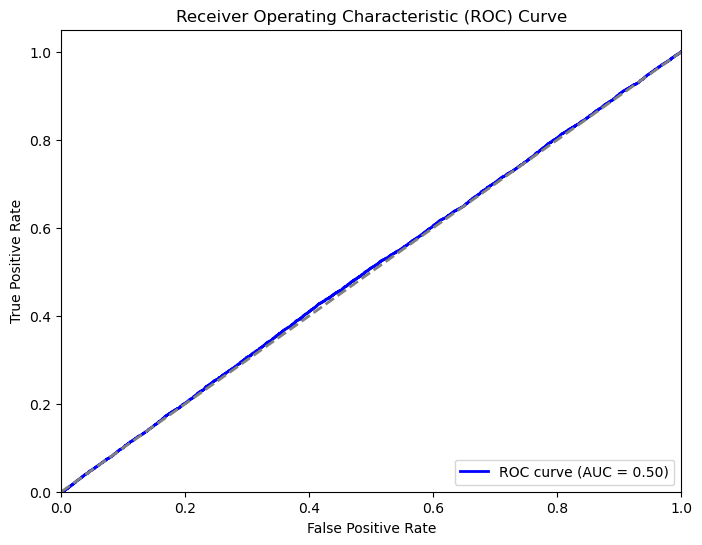

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (churn)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [1]:
# Data Collection and Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Load dataset
df = pd.read_csv('C:\\Users\\samre\\Downloads\\archive(1).zip')

# Drop irrelevant columns
df = df.drop(columns=['date_of_registration'])

# Encode categorical variables
categorical_cols = ['telecom_partner', 'gender', 'state', 'city']
encoded_df = pd.get_dummies(df, columns=categorical_cols)

# Split dataset into features and target variable
X = encoded_df.drop(columns=['churn'])
y = encoded_df['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling to handle class imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


# EDA (Exploratory Data Analysis)
import matplotlib.pyplot as plt
import seaborn as sns

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.info())

# Model Selection
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression()

# Model Training
# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Interpretation
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
significant_predictors = coefficients[coefficients['coefficient'] != 0]
print("Significant Predictors:")
print(significant_predictors)


   customer_id telecom_partner gender  age              state     city  \
0            1    Reliance Jio      F   25          Karnataka  Kolkata   
1            2    Reliance Jio      F   55            Mizoram   Mumbai   
2            3        Vodafone      F   57  Arunachal Pradesh    Delhi   
3            4            BSNL      M   46         Tamil Nadu  Kolkata   
4            5            BSNL      F   26            Tripura    Delhi   

   pincode  num_dependents  estimated_salary  calls_made  sms_sent  data_used  \
0   755597               4            124962          44        45       -361   
1   125926               2            130556          62        39       5973   
2   423976               0            148828          49        24        193   
3   522841               1             38722          80        25       9377   
4   740247               2             55098          78        15       1393   

   churn  
0      0  
1      0  
2      1  
3      1  
4      0  
cu